<a href="https://colab.research.google.com/github/usercspa/dphil/blob/main/20250509_Dtah_mitotic_events_amputation_replot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Upload CSV file using Colab's file upload widget
from google.colab import files
uploaded = files.upload()

Saving Quantification_H3Psignal_DT_pp.csv to Quantification_H3Psignal_DT_pp.csv


In [3]:
# Load the R magic
%load_ext rpy2.ipython


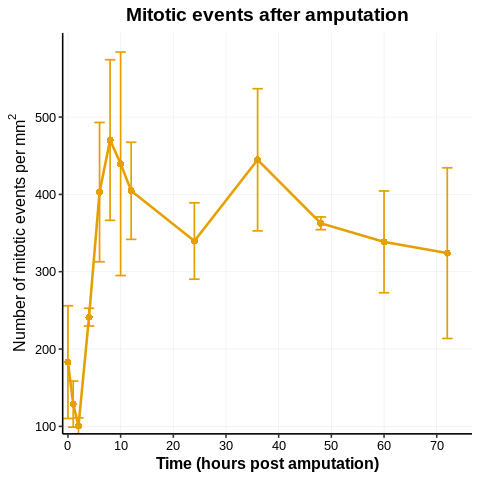

In [6]:
%%R

# Install and load ggplot2 if needed
if (!require("ggplot2")) install.packages("ggplot2", repos='http://cran.us.r-project.org')
library(ggplot2)

# Read the CSV file (replace with your uploaded filename if different)
data <- read.csv("Quantification_H3Psignal_DT_pp.csv")

# Check column names and clean if needed
names(data) <- trimws(names(data))

# Ensure numeric columns
data$mean <- as.numeric(data$mean)
data$SD <- as.numeric(data$SD)
data$Time.points <- as.numeric(data$Time.points)

# Publication-quality, colorblind-friendly plot
p <- ggplot(data, aes(x = Time.points, y = mean)) +
  geom_line(color = "#E69F00", size = 1.2) +  # Okabe & Ito orange, thicker line
  geom_point(color = "#E69F00", size = 3, shape = 16) +  # Solid circle
  geom_errorbar(aes(ymin = mean - SD, ymax = mean + SD),
                width = 2, color = "#E69F00", linewidth = 0.8) +
  scale_y_continuous(
    breaks = seq(0, max(data$mean + data$SD, na.rm=TRUE), by = 100),
    expand = expansion(mult = c(0, 0.05))
  ) +
  scale_x_continuous(
    breaks = seq(0, max(data$Time.points, na.rm=TRUE), by = 10),
    expand = expansion(mult = c(0, 0.05))
  ) +
  labs(
    x = "Time (hours post amputation)",
    y = expression("Number of mitotic events per " * mm^2),
    title = "Mitotic events after amputation"
  ) +
  theme_classic(base_size = 16, base_family = "sans") +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold"),
    axis.title = element_text(face = "bold"),
    axis.text = element_text(color = "black"),
    panel.grid.major = element_line(color = "grey90", size = 0.2),
    panel.grid.minor = element_blank()
  )

print(p)

# Save as high-resolution PNG for publication
ggsave("mitosis_posterior_fragment.png", plot = p, width = 7, height = 5, dpi = 300)
